In [1]:
import geopandas as gpd

In [2]:
full_data = gpd.read_file("../../data/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp")

In [3]:
display(full_data)
print(type(full_data))

,OBJECTID,CATEGORY,UNIT,FACILITY,CLASS,UMP,DESCRIPTIO,REGION,COUNTY,URL,SOURCE,UPDATE_,OFFICE,ACRES,LANDS_UID,GREENCERT,SHAPE_AREA,SHAPE_LEN,geometry
0,1,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,738.620192,103,N,2.990365e+06,7927.662385,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,2,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,282.553140,1218,N,1.143940e+06,4776.375600,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,3,FOR PRES DET PAR,CFP,HANCOCK FP DETACHED PARCEL,WILD FOREST,None,DELAWARE COUNTY DETACHED PARCEL,4,DELAWARE,http://www.dec.ny.gov/,DELAWARE RPP,5/12,STAMFORD,234.291262,1780,N,9.485476e+05,5783.070364,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,4,FOR PRES DET PAR,CFP,GREENE COUNTY FP DETACHED PARCEL,WILD FOREST,None,None,4,GREENE,http://www.dec.ny.gov/,GREENE RPP,5/12,STAMFORD,450.106464,2060,N,1.822293e+06,7021.644833,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,6,FOREST PRESERVE,AFP,SARANAC LAKES WILD FOREST,WILD FOREST,SARANAC LAKES,None,5,ESSEX,http://www.dec.ny.gov/lands/22593.html,"DECRP, ESSEX RPP",12/96,RAY BROOK,69.702387,1517,N,2.821959e+05,2663.909932,"POLYGON ((583896.043 4909643.187, 583891.2 490..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,8976,UNCLASSIFIED,None,None,None,None,None,6,ST. LAWRENCE,https://www.dec.ny.gov/index.html,DECRP,12/17,POTSDAM,19.122040,4703,N,7.741717e+04,3217.461334,"POLYGON ((476797.577 4963760.373, 476813.252 4..."
2979,9281,UNCLASSIFIED,None,None,None,None,None,6,ST. LAWRENCE,https://www.dec.ny.gov/index.html,DECRP,12/17,POTSDAM,1.764896,4704,N,7.145329e+03,452.953460,"POLYGON ((474212.474 4961236.101, 474189.987 4..."
2980,9282,UNIQUE AREA,SENECA 90,JUNIUS POND UNIQUE AREA,None,BARE HILL,MANAGED BY DFW,8,SENECA,http://www.dec.ny.gov/,DECRP,12/17,AVON,95.815236,4708,N,3.879159e+05,2619.450307,"POLYGON ((340844.385 4757499.092, 341048.855 4..."
2981,9288,UNIQUE AREA,None,VROMAN'S NOSE UNIQUE AREA,None,None,None,4,SCHOHARIE,https://www.dec.ny.gov/index.html,DECRP,12/17,STAMFORD,138.487592,4706,None,5.606785e+05,4361.619502,"POLYGON ((553048.551 4715991.593, 553061.611 4..."


<class 'geopandas.geodataframe.GeoDataFrame'>


In [4]:
data = full_data.loc[:, ["CLASS", "COUNTY", "geometry"]].copy()
print(data.CLASS.value_counts())

CLASS
WILD FOREST                   965
INTENSIVE USE                 108
PRIMITIVE                      60
WILDERNESS                     52
ADMINISTRATIVE                 17
UNCLASSIFIED                    7
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: count, dtype: int64


,CLASS,COUNTY,geometry
0,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
2,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.55 46..."
3,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.58 46..."
4,WILD FOREST,ESSEX,"POLYGON ((583896.043 4909643.187, 583891.2 490..."
...,...,...,...
2969,WILD FOREST,HERKIMER,"POLYGON ((506537.533 4791279.174, 506253.858 4..."
2971,WILDERNESS,HERKIMER,"POLYGON ((494287.078 4879426.659, 494303.068 4..."
2972,WILD FOREST,ONEIDA,"POLYGON ((488163.843 4823797.5, 488164.857 482..."
2973,WILD FOREST,HERKIMER,"POLYGON ((499824.232 4801687.62, 500127.226 48..."


<Axes: >

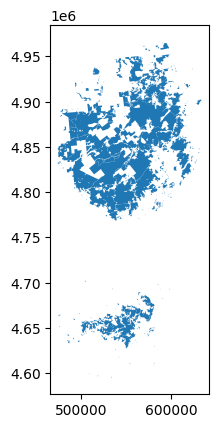

In [5]:
wild_lands = data.loc[data.CLASS.isin(["WILD FOREST", "WILDERNESS"])].copy()
display(wild_lands)
wild_lands.plot()

In [6]:
wild_lands.geometry.head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.55 46...
3    POLYGON ((541716.775 4675243.268, 541217.58 46...
4    POLYGON ((583896.043 4909643.187, 583891.2 490...
Name: geometry, dtype: geometry

In [7]:
POI_data = gpd.read_file("../../data/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp")
campsites = POI_data.loc[POI_data.ASSET == "PRIMITIVE CAMPSITE"].copy()

roads_trails = gpd.read_file("../../data/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp")
trails = roads_trails.loc[roads_trails.ASSET == "FOOT TRAIL"].copy()

counties = gpd.read_file("../../data/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp")


<Axes: >

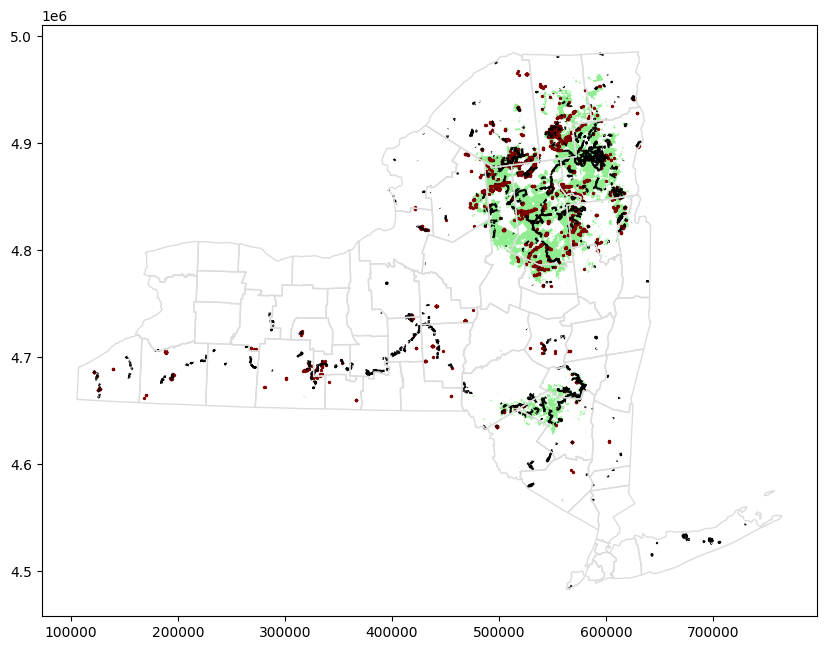

In [8]:
ax = counties.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

wild_lands.plot(color='lightgreen', ax=ax)

campsites.plot(color='maroon', markersize=2, ax=ax)

trails.plot(color='black', markersize=1, ax=ax)